Mnist Dataset

In [35]:
import torchvision
import torch
import random
import matplotlib.pyplot

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed(777)

In [37]:
mnist_train = torchvision.datasets.MNIST(
    root = "MNIST_data", 
    train=True,
    transform = torchvision.transforms.ToTensor(),
    download = True
)
mnist_test = torchvision.datasets.MNIST(
    root = "MNIST_data", 
    train=False, 
    transform = torchvision.transforms.ToTensor(), 
    download = True
)

In [38]:
batch_size = 100
data_loader = torch.utils.data.DataLoader(
    dataset=mnist_train, 
    batch_size=batch_size, 
    shuffle=True, 
    drop_last=True
)

In [39]:
linear = torch.nn.Linear(28*28, 10, bias=True).to(device)

training_epochs = 15
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [40]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
    
    print("Epoch: {:4d}, cost={}".format(epoch+1, avg_cost))

Epoch:    1, cost=0.5351505875587463
Epoch:    2, cost=0.3595777153968811
Epoch:    3, cost=0.33126428723335266
Epoch:    4, cost=0.31640467047691345
Epoch:    5, cost=0.30710697174072266
Epoch:    6, cost=0.30045655369758606
Epoch:    7, cost=0.2949334383010864
Epoch:    8, cost=0.29095619916915894
Epoch:    9, cost=0.28707411885261536
Epoch:   10, cost=0.2845156192779541
Epoch:   11, cost=0.2819140553474426
Epoch:   12, cost=0.27952688932418823
Epoch:   13, cost=0.2776365876197815
Epoch:   14, cost=0.2758747935295105
Epoch:   15, cost=0.2744227349758148


In [41]:
with torch.no_grad():
    x_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    y_test = mnist_test.targets.to(device)
    # 강의와 다르지만 data, targets로 버전이 올라가며 이름이 바뀐 듯

    prediction = linear(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: {:4f}", accuracy.item())
    

Accuracy: {:4f} 0.8883000016212463


visualization

Label: 8
prediction:  3


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

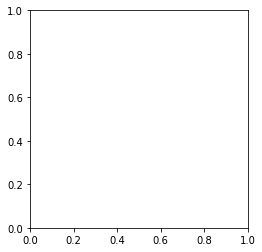

In [42]:
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.data[r].view(-1, 28*28).float().to(device)
Y_single_data = mnist_test.targets[r:r+1].to(device)
# 슬라이싱을 이용해 tensor(2) 와 같은 형태 -> tensor([2]) 와 같이 [] 넣어줄 수 있음
print("Label: {}".format(Y_single_data.item()))
single_prediction = linear(X_single_data)
print("prediction: ", torch.argmax(single_prediction, 1).item())

matplotlib.pyplot.imshow(X_single_data.view(28, 28), cmap="Greys", interpolation="nearest")
matplotlib.pyplot.show()